In [1]:
import os
import pickle
import numpy as np
import torch
from torch.utils.data import TensorDataset, DataLoader
import torchvision.transforms as transforms
from model import *
from runner import train, test, load_cifar10, load_combined_data
from torch.optim.lr_scheduler import StepLR, ReduceLROnPlateau, CosineAnnealingLR
from lossfunc import *

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
train_data, train_labels, test_data, test_labels = load_cifar10("./data/cifar-10-batches-py")  
validation_data = train_data[40000:]
validation_labels = train_labels[40000:]
train_data = train_data[:40000]
train_labels = train_labels[:40000]

In [3]:
batch_size=256
trainloader = DataLoader(TensorDataset(train_data, train_labels), batch_size=batch_size, shuffle=True, num_workers=2)
validationloader = DataLoader(TensorDataset(validation_data, validation_labels), batch_size=batch_size, shuffle=False, num_workers=2)
testloader = DataLoader(TensorDataset(test_data, test_labels), batch_size=batch_size, shuffle=False, num_workers=2)

Epoch 1/50, Train Loss: 2.304748, Validation Accuracy: 10.16%
Epoch 2/50, Train Loss: 2.303293, Validation Accuracy: 10.16%
Epoch 3/50, Train Loss: 2.302009, Validation Accuracy: 10.16%
Epoch 4/50, Train Loss: 2.300450, Validation Accuracy: 11.05%
Epoch 5/50, Train Loss: 2.298161, Validation Accuracy: 13.22%
Epoch 6/50, Train Loss: 2.294152, Validation Accuracy: 16.95%
Epoch 7/50, Train Loss: 2.285270, Validation Accuracy: 16.24%
Epoch 8/50, Train Loss: 2.261429, Validation Accuracy: 17.66%
Epoch 9/50, Train Loss: 2.210014, Validation Accuracy: 22.01%
Epoch 10/50, Train Loss: 2.133671, Validation Accuracy: 25.12%
Epoch 11/50, Train Loss: 2.033190, Validation Accuracy: 27.62%
Epoch 12/50, Train Loss: 1.953610, Validation Accuracy: 30.40%
Epoch 13/50, Train Loss: 1.902024, Validation Accuracy: 31.29%
Epoch 14/50, Train Loss: 1.858332, Validation Accuracy: 33.21%
Epoch 15/50, Train Loss: 1.817186, Validation Accuracy: 35.84%
Epoch 16/50, Train Loss: 1.778797, Validation Accuracy: 36.50%
E

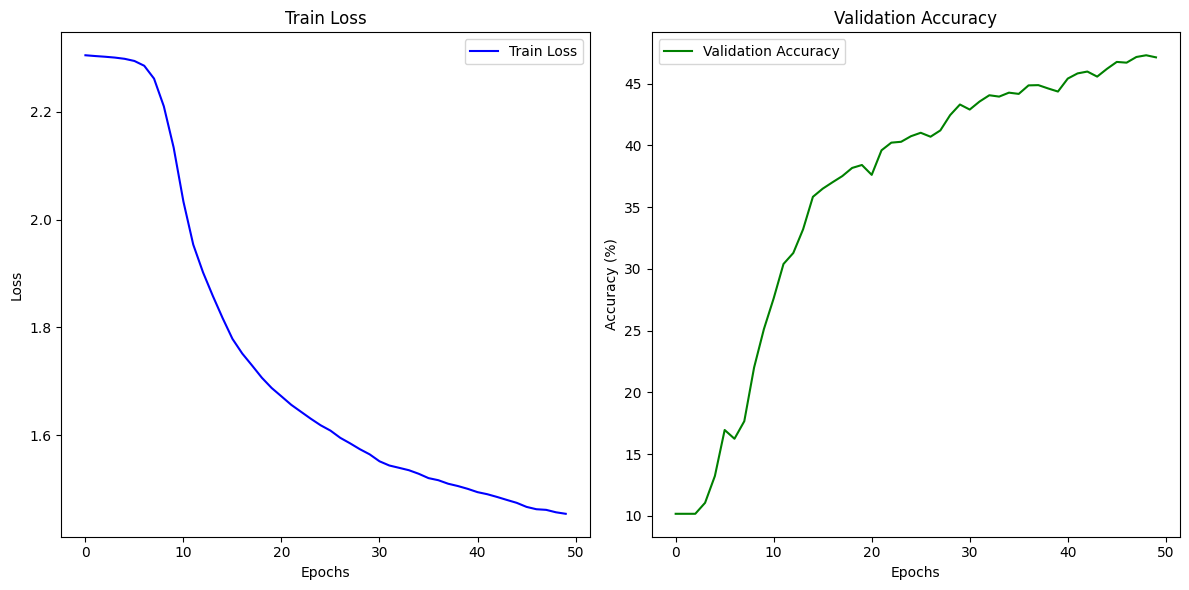

Loading the best model from Model1...
Test Accuracy: 47.27%


47.27

In [5]:
# Train with early stopping enabled
model1 = Model1().to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model1.parameters(), lr=0.01)
scheduler = StepLR(optimizer, step_size=15, gamma=0.6)
path = 'Model1'
train(model1, trainloader, validationloader, criterion, optimizer, scheduler, device, model_path=path, epochs=50, early_stopping=True, patience=10)
test(model1, testloader, device, model_path=path)

Epoch 1/50, Train Loss: 1.713061, Validation Accuracy: 43.52%
Epoch 2/50, Train Loss: 1.392910, Validation Accuracy: 52.16%
Epoch 3/50, Train Loss: 1.277992, Validation Accuracy: 53.43%
Epoch 4/50, Train Loss: 1.180199, Validation Accuracy: 58.04%
Epoch 5/50, Train Loss: 1.120480, Validation Accuracy: 56.74%
Epoch 6/50, Train Loss: 1.067969, Validation Accuracy: 60.12%
Epoch 7/50, Train Loss: 1.018278, Validation Accuracy: 59.75%
Epoch 8/50, Train Loss: 0.978343, Validation Accuracy: 61.06%
Epoch 9/50, Train Loss: 0.943056, Validation Accuracy: 59.41%
Epoch 10/50, Train Loss: 0.919667, Validation Accuracy: 60.18%
Epoch 11/50, Train Loss: 0.885815, Validation Accuracy: 60.45%
Epoch 12/50, Train Loss: 0.861661, Validation Accuracy: 59.89%
Epoch 13/50, Train Loss: 0.838885, Validation Accuracy: 59.45%
Epoch 14/50, Train Loss: 0.814044, Validation Accuracy: 60.58%
Epoch 15/50, Train Loss: 0.795309, Validation Accuracy: 59.36%
Epoch 16/50, Train Loss: 0.703575, Validation Accuracy: 61.21%
E

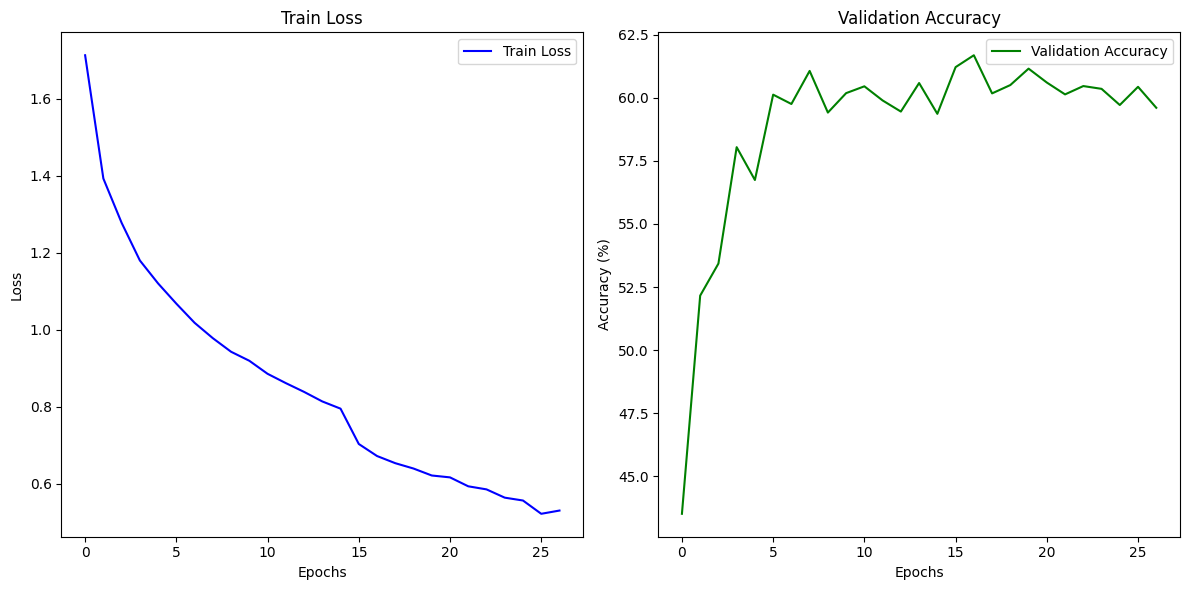

Loading the best model from Model1_1...
Test Accuracy: 61.37%


61.37

In [6]:
# Train with early stopping enabled
model1_1 = Model1().to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model1_1.parameters(), lr=0.005, betas=(0.9, 0.999))
scheduler = StepLR(optimizer, step_size=15, gamma=0.6)
path = 'Model1_1'
train(model1_1, trainloader, validationloader, criterion, optimizer, scheduler, device, model_path=path, epochs=50, early_stopping=True, patience=10)
test(model1_1, testloader, device, model_path=path)

Epoch 1/50, Train Loss: 2.225, Validation Accuracy: 41.28%
Epoch 2/50, Train Loss: 1.672, Validation Accuracy: 47.99%
Epoch 3/50, Train Loss: 1.539, Validation Accuracy: 54.43%
Epoch 4/50, Train Loss: 1.453, Validation Accuracy: 57.76%
Epoch 5/50, Train Loss: 1.380, Validation Accuracy: 62.53%
Epoch 6/50, Train Loss: 1.332, Validation Accuracy: 61.06%
Epoch 7/50, Train Loss: 1.292, Validation Accuracy: 64.32%
Epoch 8/50, Train Loss: 1.258, Validation Accuracy: 64.79%
Epoch 9/50, Train Loss: 1.231, Validation Accuracy: 66.50%
Epoch 10/50, Train Loss: 1.205, Validation Accuracy: 66.89%
Epoch 11/50, Train Loss: 1.174, Validation Accuracy: 67.13%
Epoch 12/50, Train Loss: 1.164, Validation Accuracy: 68.29%
Epoch 13/50, Train Loss: 1.135, Validation Accuracy: 69.14%
Epoch 14/50, Train Loss: 1.124, Validation Accuracy: 68.58%
Epoch 15/50, Train Loss: 1.104, Validation Accuracy: 68.03%
Epoch 16/50, Train Loss: 1.046, Validation Accuracy: 69.58%
Epoch 17/50, Train Loss: 1.011, Validation Accura

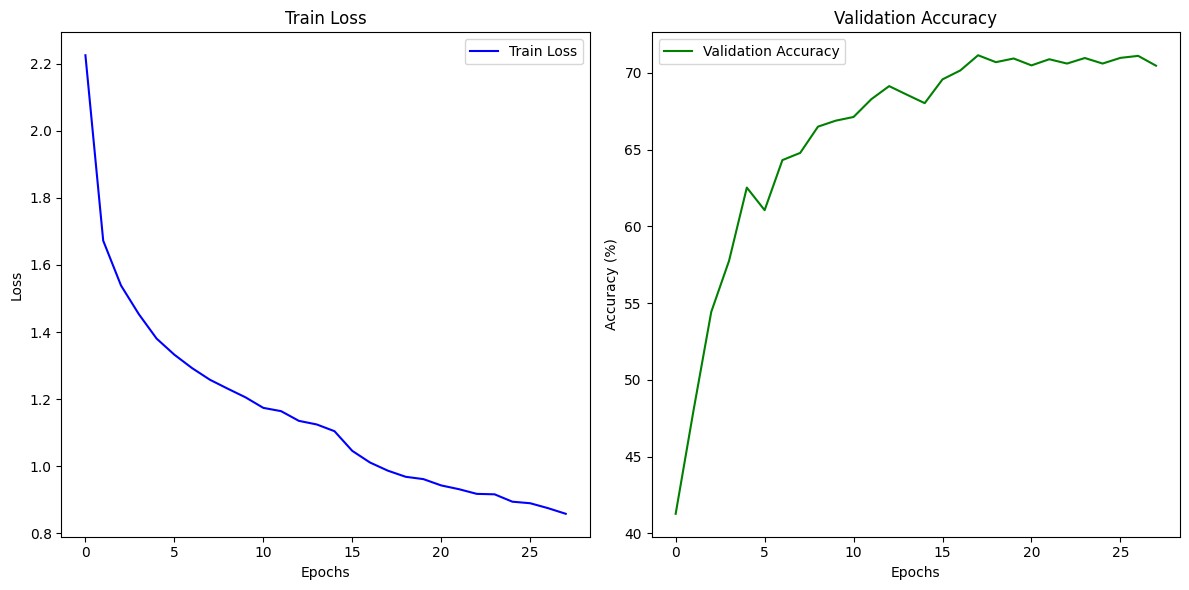

Loading the best model from Model2...
Test Accuracy: 71.15%


71.15

In [ ]:
# Train with early stopping enabled
model2 = Model2().to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model2.parameters(), lr=0.005, betas=(0.9, 0.999))
scheduler = StepLR(optimizer, step_size=15, gamma=0.6)
path = 'Model2'
train(model2, trainloader, validationloader, criterion, optimizer, scheduler, device, model_path=path, epochs=50, early_stopping=True, patience=10)
test(model2, testloader, device, model_path=path)

Epoch 1/50, Train Loss: 1.755, Validation Accuracy: 47.53%
Epoch 2/50, Train Loss: 1.282, Validation Accuracy: 58.16%
Epoch 3/50, Train Loss: 1.017, Validation Accuracy: 41.51%
Epoch 4/50, Train Loss: 1.042, Validation Accuracy: 66.63%
Epoch 5/50, Train Loss: 0.806, Validation Accuracy: 69.27%
Epoch 6/50, Train Loss: 0.697, Validation Accuracy: 71.01%
Epoch 7/50, Train Loss: 0.608, Validation Accuracy: 73.83%
Epoch 8/50, Train Loss: 0.522, Validation Accuracy: 72.39%
Epoch 9/50, Train Loss: 0.446, Validation Accuracy: 73.27%
Epoch 10/50, Train Loss: 0.374, Validation Accuracy: 73.52%
Epoch 11/50, Train Loss: 0.199, Validation Accuracy: 75.09%
Epoch 12/50, Train Loss: 0.117, Validation Accuracy: 75.17%
Epoch 13/50, Train Loss: 0.107, Validation Accuracy: 74.54%
Epoch 14/50, Train Loss: 0.091, Validation Accuracy: 74.15%
Epoch 15/50, Train Loss: 0.080, Validation Accuracy: 74.34%
Epoch 16/50, Train Loss: 0.082, Validation Accuracy: 74.47%
Epoch 17/50, Train Loss: 0.069, Validation Accura

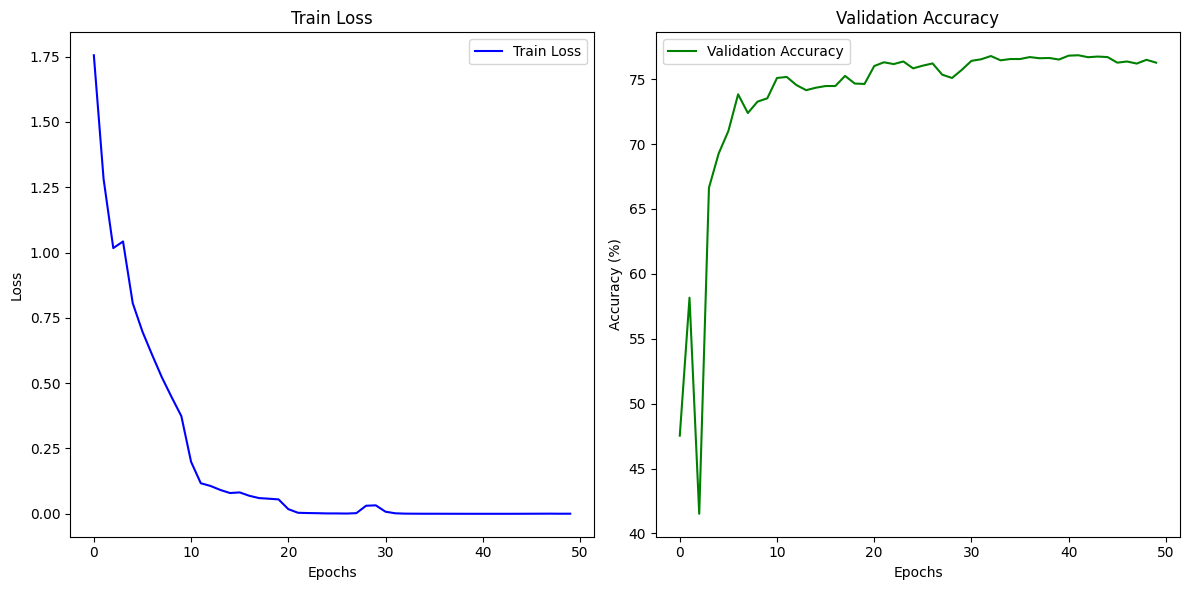

Loading the best model from Model_ResNet18...
Test Accuracy: 76.84%


76.84

In [ ]:
# Train with early stopping enabled
model_ResNet18 = model_ResNet18().to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_ResNet18.parameters(), lr=0.01, betas=(0.9, 0.999))
scheduler = StepLR(optimizer, step_size=10, gamma=0.5)
path = 'Model_ResNet18'
train(model_ResNet18, trainloader, validationloader, criterion, optimizer, scheduler, device, model_path=path, epochs=50, early_stopping=True, patience=10)
test(model_ResNet18, testloader, device, model_path=path)

Epoch 1/100, Train Loss: 1.887274, Validation Accuracy: 37.03%
Epoch 2/100, Train Loss: 1.344275, Validation Accuracy: 54.67%
Epoch 3/100, Train Loss: 1.081792, Validation Accuracy: 60.17%
Epoch 4/100, Train Loss: 0.932375, Validation Accuracy: 64.98%
Epoch 5/100, Train Loss: 0.837089, Validation Accuracy: 64.48%
Epoch 6/100, Train Loss: 0.767467, Validation Accuracy: 68.07%
Epoch 7/100, Train Loss: 0.725227, Validation Accuracy: 69.03%
Epoch 8/100, Train Loss: 0.682469, Validation Accuracy: 69.10%
Epoch 9/100, Train Loss: 0.649093, Validation Accuracy: 69.85%
Epoch 10/100, Train Loss: 0.628390, Validation Accuracy: 71.15%
Epoch 11/100, Train Loss: 0.604794, Validation Accuracy: 67.66%
Epoch 12/100, Train Loss: 0.576933, Validation Accuracy: 72.91%
Epoch 13/100, Train Loss: 0.571360, Validation Accuracy: 73.12%
Epoch 14/100, Train Loss: 0.549822, Validation Accuracy: 73.06%
Epoch 15/100, Train Loss: 0.529334, Validation Accuracy: 74.27%
Epoch 16/100, Train Loss: 0.531676, Validation Ac

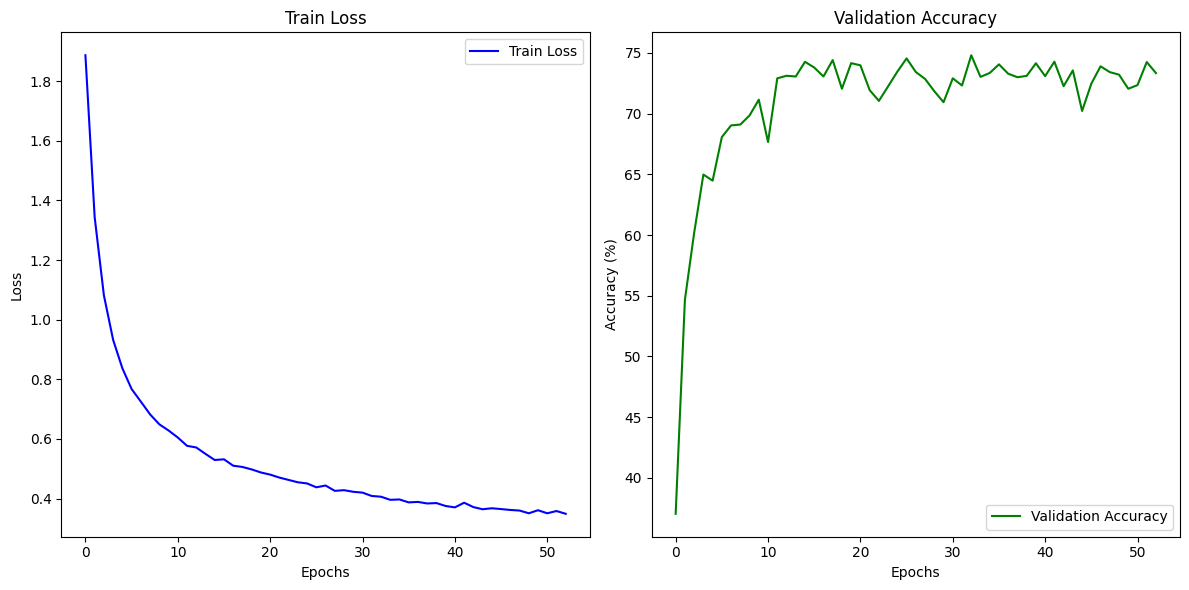

Loading the best model from Model_ResNet18_2...
Test Accuracy: 74.81%


74.81

In [ ]:
from model import *
# Train with early stopping enabled
model_ResNet18_2 = model_ResNet18().to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_ResNet18_2.parameters(), lr=0.01, betas=(0.9, 0.999), weight_decay=1e-4)  # using L2 regulation
scheduler = ReduceLROnPlateau(optimizer, 'min', patience=3, factor=0.5, min_lr=1e-6) # Automatically adjust the learning rate
path = 'Model_ResNet18_2'
# Train with early stopping enabled
train(model_ResNet18_2, trainloader, validationloader, criterion, optimizer, scheduler, device, model_path=path, epochs=100, early_stopping=True, patience=20)
test(model_ResNet18_2, testloader, device, model_path=path)

Epoch 1/60, Train Loss: 1.818530, Validation Accuracy: 45.86%
Epoch 2/60, Train Loss: 1.313527, Validation Accuracy: 55.58%
Epoch 3/60, Train Loss: 1.080209, Validation Accuracy: 59.42%
Epoch 4/60, Train Loss: 0.917001, Validation Accuracy: 64.71%
Epoch 5/60, Train Loss: 0.829345, Validation Accuracy: 67.36%
Epoch 6/60, Train Loss: 0.768080, Validation Accuracy: 65.50%
Epoch 7/60, Train Loss: 0.724572, Validation Accuracy: 67.52%
Epoch 8/60, Train Loss: 0.681987, Validation Accuracy: 71.70%
Epoch 9/60, Train Loss: 0.656050, Validation Accuracy: 70.26%
Epoch 10/60, Train Loss: 0.621282, Validation Accuracy: 70.67%
Epoch 11/60, Train Loss: 0.460211, Validation Accuracy: 74.54%
Epoch 12/60, Train Loss: 0.403234, Validation Accuracy: 75.22%
Epoch 13/60, Train Loss: 0.375776, Validation Accuracy: 73.79%
Epoch 14/60, Train Loss: 0.349872, Validation Accuracy: 74.20%
Epoch 15/60, Train Loss: 0.322767, Validation Accuracy: 74.45%
Epoch 16/60, Train Loss: 0.298285, Validation Accuracy: 73.81%
E

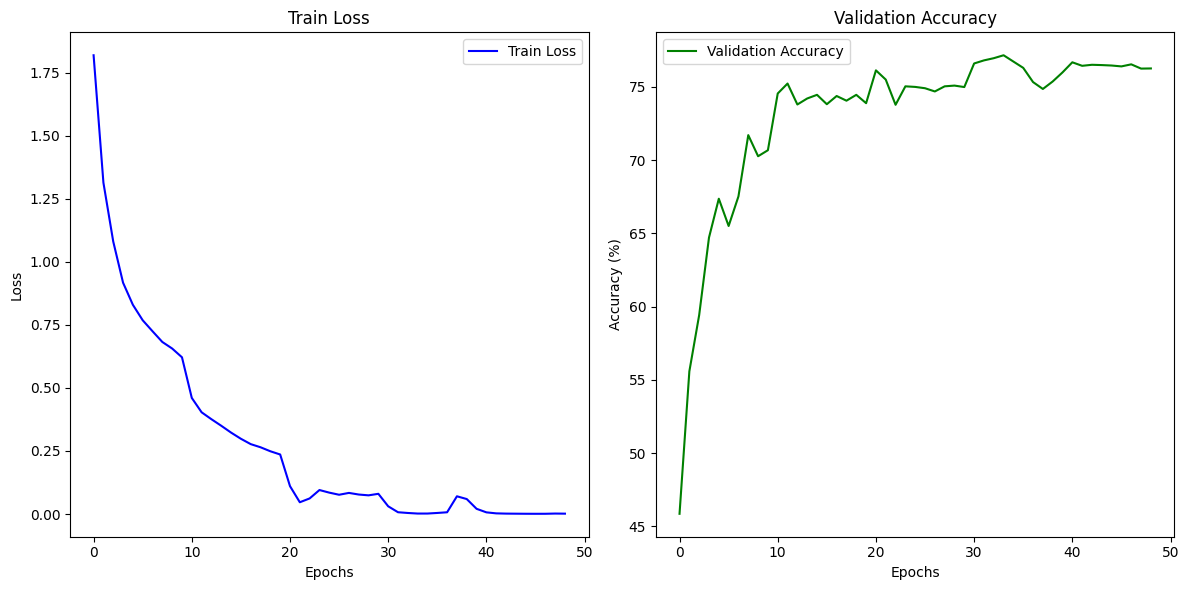

Loading the best model from Model_ResNet18_3...
Test Accuracy: 77.15%


77.15

In [ ]:
from model import *
# Train with early stopping enabled
model_ResNet18_3 = model_ResNet18().to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_ResNet18_3.parameters(), lr=0.01, betas=(0.9, 0.999), weight_decay=1e-4)  # using L2 regulation
scheduler = StepLR(optimizer, step_size=10, gamma=0.5)
path = 'Model_ResNet18_3'
# Train with early stopping enabled
train(model_ResNet18_3, trainloader, validationloader, criterion, optimizer, scheduler, device, model_path=path, epochs=60, early_stopping=True, patience=15)
test(model_ResNet18_3, testloader, device, model_path=path)

Epoch 1/60, Train Loss: 1.864986, Validation Accuracy: 47.45%
Epoch 2/60, Train Loss: 1.419143, Validation Accuracy: 55.04%
Epoch 3/60, Train Loss: 1.249044, Validation Accuracy: 64.45%
Epoch 4/60, Train Loss: 1.171910, Validation Accuracy: 58.55%
Epoch 5/60, Train Loss: 1.120886, Validation Accuracy: 63.05%
Epoch 6/60, Train Loss: 1.087533, Validation Accuracy: 67.13%
Epoch 7/60, Train Loss: 1.062396, Validation Accuracy: 66.45%
Epoch 8/60, Train Loss: 1.043669, Validation Accuracy: 67.88%
Epoch 9/60, Train Loss: 1.021925, Validation Accuracy: 69.41%
Epoch 10/60, Train Loss: 1.007208, Validation Accuracy: 70.53%
Epoch 11/60, Train Loss: 0.843068, Validation Accuracy: 73.20%
Epoch 12/60, Train Loss: 0.796869, Validation Accuracy: 74.78%
Epoch 13/60, Train Loss: 0.767924, Validation Accuracy: 75.14%
Epoch 14/60, Train Loss: 0.739461, Validation Accuracy: 74.41%
Epoch 15/60, Train Loss: 0.720099, Validation Accuracy: 74.89%
Epoch 16/60, Train Loss: 0.698111, Validation Accuracy: 72.95%
E

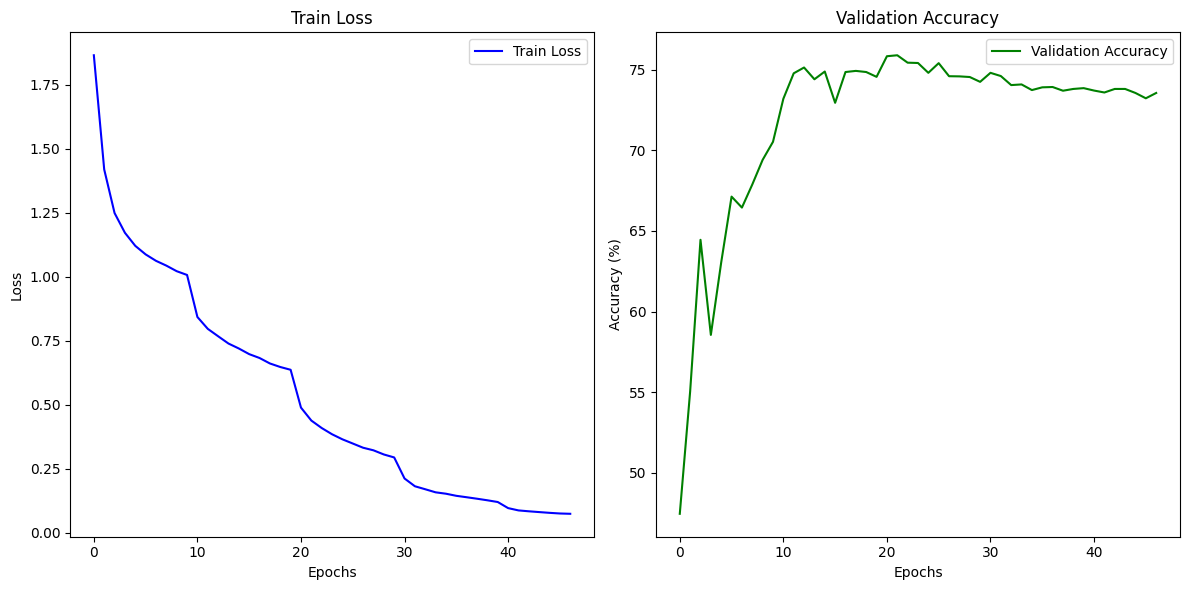

Loading the best model from Model_ResNet18_4...
Test Accuracy: 75.90%


75.9

In [ ]:
# Load the combined dataset (from 'combined_data.pkl')
trainloader_aug = load_combined_data('data/augmented_images/combined_data.pkl')

model_ResNet18_4 = model_ResNet18().to(device)  # Using augmented data
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_ResNet18_4.parameters(), lr=0.01, betas=(0.9, 0.999), weight_decay=1e-4)  # Using L2 regularization
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.35)
path = 'Model_ResNet18_4'
# Train with early stopping enabled
train(model_ResNet18_4, trainloader_aug, validationloader, criterion, optimizer, scheduler, device, model_path=path, epochs=60, early_stopping=True, patience=25)
# Test the model
test(model_ResNet18_4, testloader, device, model_path=path)

Epoch 1/60, Train Loss: 1.519757, Validation Accuracy: 59.23%
Epoch 2/60, Train Loss: 1.160629, Validation Accuracy: 67.12%
Epoch 3/60, Train Loss: 0.998892, Validation Accuracy: 70.33%
Epoch 4/60, Train Loss: 0.882885, Validation Accuracy: 73.13%
Epoch 5/60, Train Loss: 0.787211, Validation Accuracy: 75.76%
Epoch 6/60, Train Loss: 0.704417, Validation Accuracy: 75.76%
Epoch 7/60, Train Loss: 0.631137, Validation Accuracy: 75.47%
Epoch 8/60, Train Loss: 0.555221, Validation Accuracy: 76.61%
Epoch 9/60, Train Loss: 0.480791, Validation Accuracy: 76.85%
Epoch 10/60, Train Loss: 0.417017, Validation Accuracy: 77.15%
Epoch 11/60, Train Loss: 0.354831, Validation Accuracy: 77.51%
Epoch 12/60, Train Loss: 0.301292, Validation Accuracy: 76.39%
Epoch 13/60, Train Loss: 0.258674, Validation Accuracy: 76.95%
Epoch 14/60, Train Loss: 0.226107, Validation Accuracy: 77.17%
Epoch 15/60, Train Loss: 0.195290, Validation Accuracy: 76.25%
Epoch 16/60, Train Loss: 0.175919, Validation Accuracy: 76.64%
E

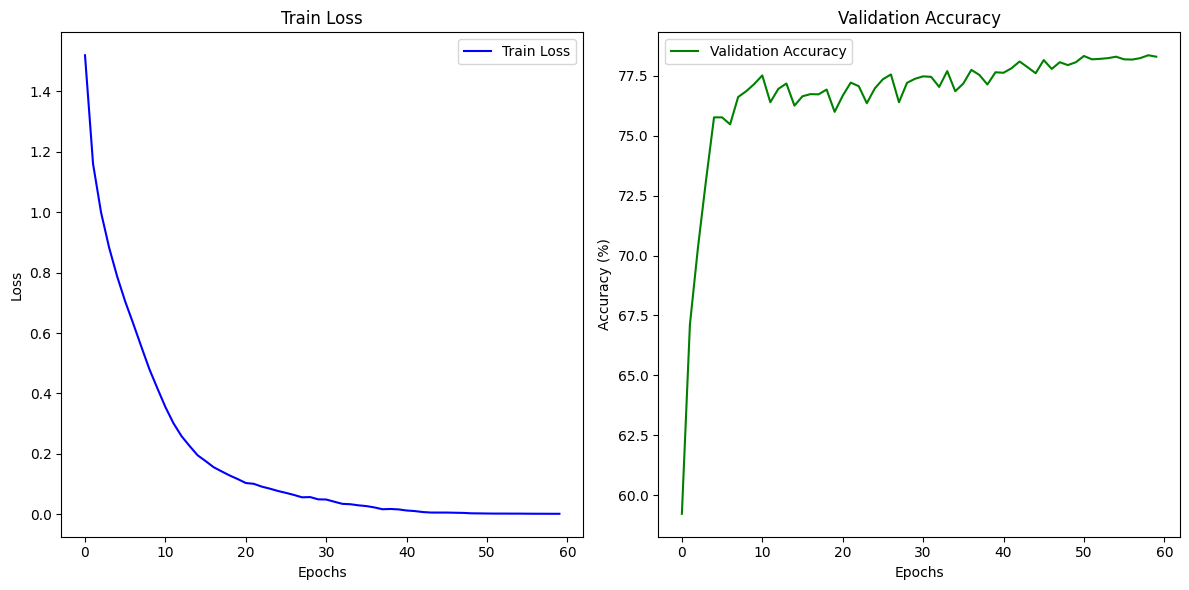

Loading the best model from Model_ResNet18_5...
Test Accuracy: 78.35%


78.35

In [ ]:
# Load the combined dataset (from 'combined_data.pkl')
trainloader_aug = load_combined_data('data/augmented_images/combined_data.pkl')

model_ResNet18_5 = model_ResNet18().to(device)  # Using augmented data
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_ResNet18_5.parameters(), lr=0.001, betas=(0.9, 0.999), weight_decay=1e-4)  # Using L2 regularization
scheduler = CosineAnnealingLR(optimizer, T_max=60, eta_min=1e-6)
path = 'Model_ResNet18_5'
# Train with early stopping enabled
train(model_ResNet18_5, trainloader_aug, validationloader, criterion, optimizer, scheduler, device, model_path=path, epochs=60, early_stopping=True, patience=25)
# Test the model
test(model_ResNet18_5, testloader, device, model_path=path)

Epoch 1/60, Train Loss: 1.535656, Validation Accuracy: 57.46%
Epoch 2/60, Train Loss: 1.104989, Validation Accuracy: 67.37%
Epoch 3/60, Train Loss: 0.901866, Validation Accuracy: 76.40%
Epoch 4/60, Train Loss: 0.785928, Validation Accuracy: 79.47%
Epoch 5/60, Train Loss: 0.693119, Validation Accuracy: 79.92%
Epoch 6/60, Train Loss: 0.613365, Validation Accuracy: 80.36%
Epoch 7/60, Train Loss: 0.543415, Validation Accuracy: 83.16%
Epoch 8/60, Train Loss: 0.477658, Validation Accuracy: 83.07%
Epoch 9/60, Train Loss: 0.418580, Validation Accuracy: 83.90%
Epoch 10/60, Train Loss: 0.360676, Validation Accuracy: 83.62%
Epoch 11/60, Train Loss: 0.310969, Validation Accuracy: 85.05%
Epoch 12/60, Train Loss: 0.269050, Validation Accuracy: 84.14%
Epoch 13/60, Train Loss: 0.233095, Validation Accuracy: 84.77%
Epoch 14/60, Train Loss: 0.202089, Validation Accuracy: 84.44%
Epoch 15/60, Train Loss: 0.176132, Validation Accuracy: 85.37%
Epoch 16/60, Train Loss: 0.162971, Validation Accuracy: 83.94%
E

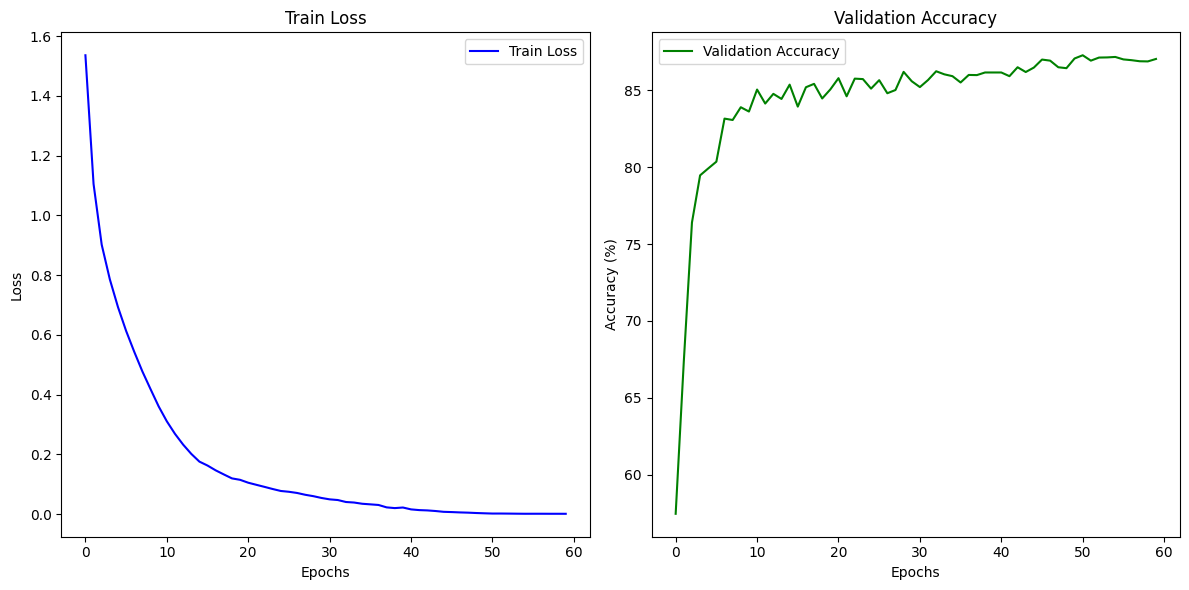

Loading the best model from Model_ResNet18_6...
Test Accuracy: 87.28%


87.28

In [ ]:
# Load the combined dataset, using more augmented images (40000 initial images+ 40000 augmented images)
trainloader_aug = load_combined_data('data/augmented_images_2/combined_data.pkl')

model_ResNet18_6 = model_ResNet18_C().to(device)  # Change activation to GeLu, and use dropout layer with dropout rate=0.2, also use 2 FC layers
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_ResNet18_6.parameters(), lr=0.001, betas=(0.9, 0.999), weight_decay=1e-4)  # Using L2 regularization
scheduler = CosineAnnealingLR(optimizer, T_max=60, eta_min=1e-6)
path = 'Model_ResNet18_6'
# Train with early stopping enabled
train(model_ResNet18_6, trainloader_aug, validationloader, criterion, optimizer, scheduler, device, model_path=path, epochs=60, early_stopping=True, patience=15)
# Test the model
test(model_ResNet18_6, testloader, device, model_path=path)

Epoch 1/60, Train Loss: 1.647195, Validation Accuracy: 50.60%
Epoch 2/60, Train Loss: 1.225303, Validation Accuracy: 64.01%
Epoch 3/60, Train Loss: 1.009078, Validation Accuracy: 73.13%
Epoch 4/60, Train Loss: 0.864228, Validation Accuracy: 78.42%
Epoch 5/60, Train Loss: 0.758797, Validation Accuracy: 77.34%
Epoch 6/60, Train Loss: 0.674920, Validation Accuracy: 79.41%
Epoch 7/60, Train Loss: 0.603156, Validation Accuracy: 83.74%
Epoch 8/60, Train Loss: 0.533860, Validation Accuracy: 83.50%
Epoch 9/60, Train Loss: 0.474019, Validation Accuracy: 84.90%
Epoch 10/60, Train Loss: 0.416975, Validation Accuracy: 83.47%
Epoch 11/60, Train Loss: 0.367415, Validation Accuracy: 83.80%
Epoch 12/60, Train Loss: 0.320578, Validation Accuracy: 84.63%
Epoch 13/60, Train Loss: 0.280386, Validation Accuracy: 85.48%
Epoch 14/60, Train Loss: 0.241666, Validation Accuracy: 84.91%
Epoch 15/60, Train Loss: 0.216157, Validation Accuracy: 84.94%
Epoch 16/60, Train Loss: 0.190320, Validation Accuracy: 85.03%
E

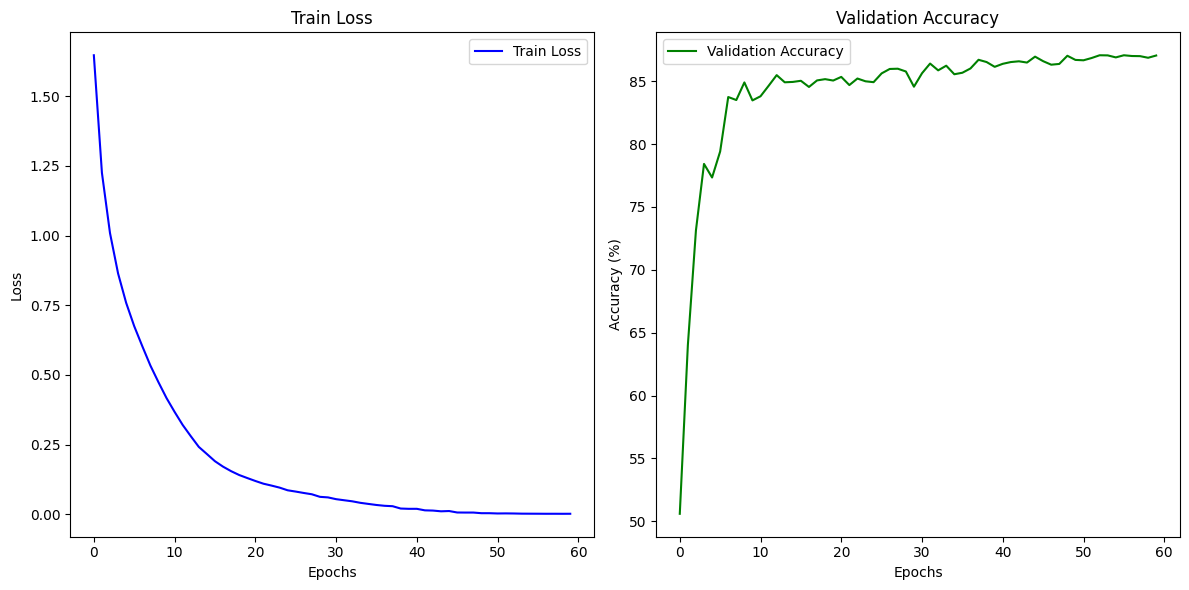

Loading the best model from Model_ResNet18_7...
Test Accuracy: 87.06%


87.06

In [ ]:
# Load the combined dataset, using more augmented images (40000 initial images+ 40000 augmented images)
trainloader_aug = load_combined_data('data/augmented_images_2/combined_data.pkl')

model_ResNet18_7 = model_ResNet18_H().to(device)  # Change activation to GeLu and LeakyReLu, and use dropout layer with dropout rate=0.3, and also use 3 FC layers
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_ResNet18_7.parameters(), lr=0.001, betas=(0.9, 0.999), weight_decay=1e-4)  # Using L2 regularization
scheduler = CosineAnnealingLR(optimizer, T_max=60, eta_min=1e-6)
path = 'Model_ResNet18_7'
# Train with early stopping enabled
train(model_ResNet18_7, trainloader_aug, validationloader, criterion, optimizer, scheduler, device, model_path=path, epochs=60, early_stopping=True, patience=15)
# Test the model
test(model_ResNet18_7, testloader, device, model_path=path)

Epoch 1/60, Train Loss: 1.803044, Validation Accuracy: 54.40%
Epoch 2/60, Train Loss: 1.439961, Validation Accuracy: 71.02%
Epoch 3/60, Train Loss: 1.262883, Validation Accuracy: 77.70%
Epoch 4/60, Train Loss: 1.149320, Validation Accuracy: 79.13%
Epoch 5/60, Train Loss: 1.063151, Validation Accuracy: 82.04%
Epoch 6/60, Train Loss: 0.985749, Validation Accuracy: 82.33%
Epoch 7/60, Train Loss: 0.916800, Validation Accuracy: 83.23%
Epoch 8/60, Train Loss: 0.848793, Validation Accuracy: 83.53%
Epoch 9/60, Train Loss: 0.789024, Validation Accuracy: 84.73%
Epoch 10/60, Train Loss: 0.740983, Validation Accuracy: 84.77%
Epoch 11/60, Train Loss: 0.701372, Validation Accuracy: 83.88%
Epoch 12/60, Train Loss: 0.673721, Validation Accuracy: 84.68%
Epoch 13/60, Train Loss: 0.649425, Validation Accuracy: 84.20%
Epoch 14/60, Train Loss: 0.633841, Validation Accuracy: 84.14%
Epoch 15/60, Train Loss: 0.622455, Validation Accuracy: 84.44%
Epoch 16/60, Train Loss: 0.613261, Validation Accuracy: 84.88%
E

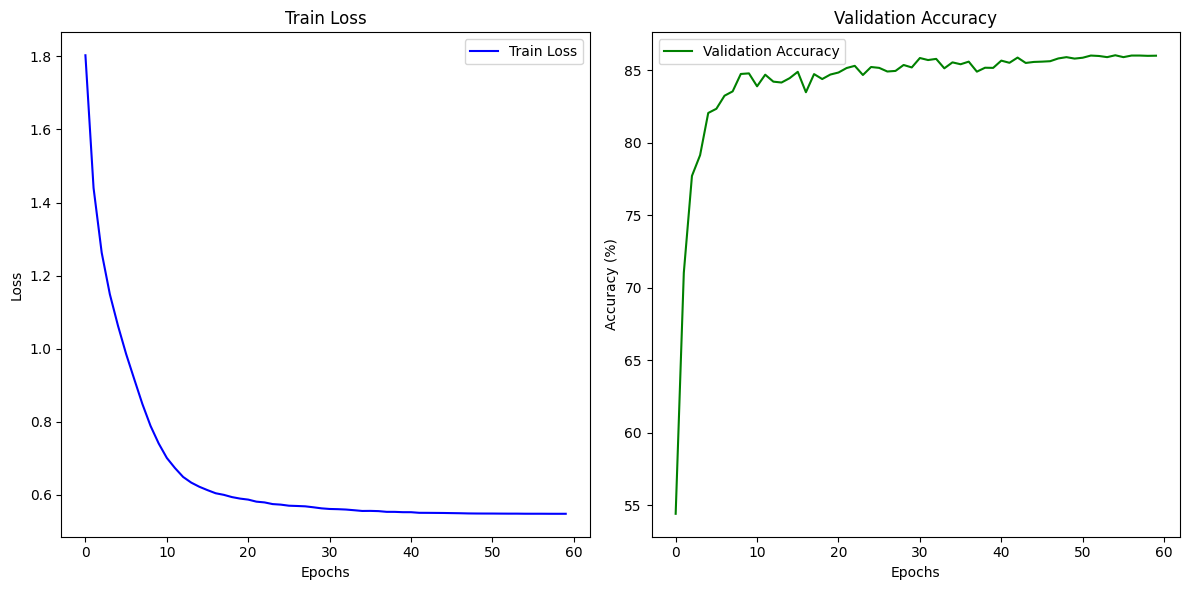

Loading the best model from Model_ResNet18_8...
Test Accuracy: 86.02%


86.02

In [ ]:
# Load the combined dataset, using more augmented images (40000 initial images+ 40000 augmented images)
trainloader_aug = load_combined_data('data/augmented_images_2/combined_data.pkl')

model_ResNet18_8 = model_ResNet18_H().to(device)  # Change activation to GeLu and LeakyReLu, and use dropout layer with dropout rate=0.3, and also use 3 FC layers
criterion = LabelSmoothingLoss(smoothing=0.1)  # 使用Label Smoothing Loss
optimizer = torch.optim.AdamW(model_ResNet18_8.parameters(), lr=0.001, weight_decay=0.01)  # Change to AdamW Optimizer
scheduler = CosineAnnealingLR(optimizer, T_max=60, eta_min=1e-6)
path = 'Model_ResNet18_8'
# Train with early stopping enabled
train(model_ResNet18_8, trainloader_aug, validationloader, criterion, optimizer, scheduler, device, model_path=path, epochs=60, early_stopping=True, patience=15)
# Test the model
test(model_ResNet18_8, testloader, device, model_path=path)

Epoch 1/60, Train Loss: 1.450947, Validation Accuracy: 68.52%
Epoch 2/60, Train Loss: 0.982494, Validation Accuracy: 77.38%
Epoch 3/60, Train Loss: 0.803830, Validation Accuracy: 82.85%
Epoch 4/60, Train Loss: 0.691068, Validation Accuracy: 83.79%
Epoch 5/60, Train Loss: 0.606853, Validation Accuracy: 85.31%
Epoch 6/60, Train Loss: 0.539961, Validation Accuracy: 86.28%
Epoch 7/60, Train Loss: 0.486211, Validation Accuracy: 86.43%
Epoch 8/60, Train Loss: 0.438351, Validation Accuracy: 86.69%
Epoch 9/60, Train Loss: 0.396047, Validation Accuracy: 87.27%
Epoch 10/60, Train Loss: 0.360797, Validation Accuracy: 87.43%
Epoch 11/60, Train Loss: 0.325877, Validation Accuracy: 87.18%
Epoch 12/60, Train Loss: 0.298994, Validation Accuracy: 87.66%
Epoch 13/60, Train Loss: 0.274745, Validation Accuracy: 87.38%
Epoch 14/60, Train Loss: 0.251493, Validation Accuracy: 86.60%
Epoch 15/60, Train Loss: 0.235756, Validation Accuracy: 87.24%
Epoch 16/60, Train Loss: 0.218068, Validation Accuracy: 87.35%
E

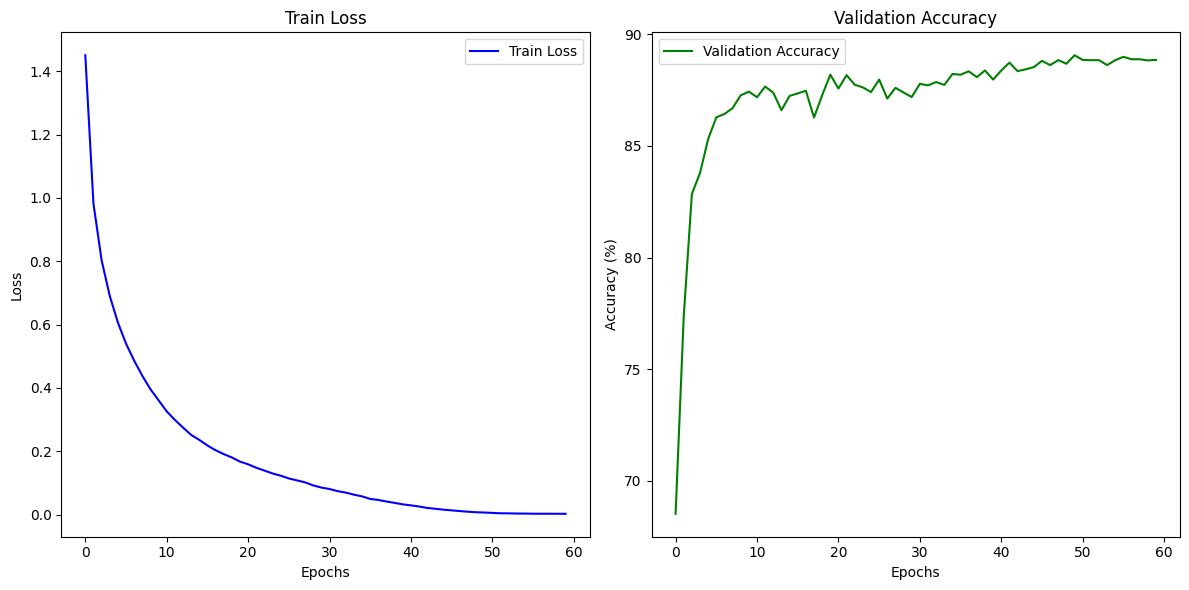

Loading the best model from Model_ResNet18_9...
Test Accuracy: 89.06%


89.06

In [ ]:
# Load the combined dataset, using more augmented images (40000 initial images+ 120000 augmented images)
trainloader_aug = load_combined_data('data/augmented_images_3/combined_data.pkl')

model_ResNet18_9 = model_ResNet18_C().to(device)  # Change activation to GeLu, and use dropout layer with dropout rate=0.2, also use 2 FC layers
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_ResNet18_9.parameters(), lr=0.001, betas=(0.9, 0.999), weight_decay=1e-4)  # Using L2 regularization
scheduler = CosineAnnealingLR(optimizer, T_max=60, eta_min=1e-6)
path = 'Model_ResNet18_9'
# Train with early stopping enabled
train(model_ResNet18_9, trainloader_aug, validationloader, criterion, optimizer, scheduler, device, model_path=path, epochs=60, early_stopping=True, patience=20)
# Test the model
test(model_ResNet18_9, testloader, device, model_path=path)

Epoch 1/60, Train Loss: 1.726591, Validation Accuracy: 55.68%
Epoch 2/60, Train Loss: 1.213443, Validation Accuracy: 69.99%
Epoch 3/60, Train Loss: 0.952604, Validation Accuracy: 75.28%
Epoch 4/60, Train Loss: 0.786522, Validation Accuracy: 79.35%
Epoch 5/60, Train Loss: 0.668586, Validation Accuracy: 79.53%
Epoch 6/60, Train Loss: 0.572126, Validation Accuracy: 83.85%
Epoch 7/60, Train Loss: 0.483389, Validation Accuracy: 83.23%
Epoch 8/60, Train Loss: 0.394959, Validation Accuracy: 84.79%
Epoch 9/60, Train Loss: 0.316370, Validation Accuracy: 85.38%
Epoch 10/60, Train Loss: 0.244685, Validation Accuracy: 85.21%
Epoch 11/60, Train Loss: 0.191757, Validation Accuracy: 83.78%
Epoch 12/60, Train Loss: 0.149432, Validation Accuracy: 85.48%
Epoch 13/60, Train Loss: 0.115787, Validation Accuracy: 85.18%
Epoch 14/60, Train Loss: 0.097939, Validation Accuracy: 86.08%
Epoch 15/60, Train Loss: 0.085322, Validation Accuracy: 84.86%
Epoch 16/60, Train Loss: 0.071447, Validation Accuracy: 85.79%
E

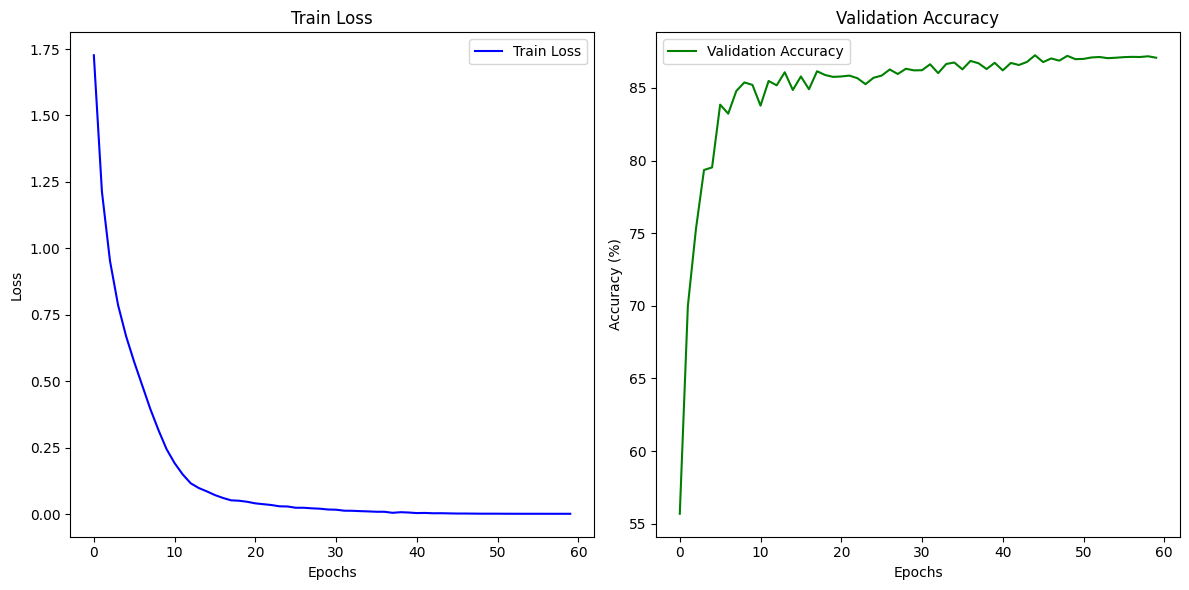

Loading the best model from Model_ResNet34...
Test Accuracy: 87.25%


87.25

In [ ]:
# Load the combined dataset, using more augmented images (40000 initial images+ 120000 augmented images)
trainloader_aug = load_combined_data('data/augmented_images_2/combined_data.pkl')

model_ResNet34 = model_ResNet34_C().to(device)  # Updated model to 'Model_ResNet34'
criterion = torch.nn.CrossEntropyLoss()  
optimizer = torch.optim.AdamW(model_ResNet34.parameters(), lr=0.001, weight_decay=0.001)  # AdamW optimizer
scheduler = CosineAnnealingLR(optimizer, T_max=60, eta_min=1e-6)  # Cosine annealing learning rate scheduler
path = 'Model_ResNet34' 
# Train the model with early stopping
train(model_ResNet34, trainloader_aug, validationloader, criterion, optimizer, scheduler, device, model_path=path, epochs=60, early_stopping=True, patience=15)
# Evaluate the model on test dataset
test(model_ResNet34, testloader, device, model_path=path)

Epoch 1/200, Train Loss: 1.457411, Validation Accuracy: 67.22%
Epoch 2/200, Train Loss: 1.001926, Validation Accuracy: 74.82%
Epoch 3/200, Train Loss: 0.831124, Validation Accuracy: 79.08%
Epoch 4/200, Train Loss: 0.735484, Validation Accuracy: 83.30%
Epoch 5/200, Train Loss: 0.670735, Validation Accuracy: 83.48%
Epoch 6/200, Train Loss: 0.621314, Validation Accuracy: 85.78%
Epoch 7/200, Train Loss: 0.582781, Validation Accuracy: 83.63%
Epoch 8/200, Train Loss: 0.548482, Validation Accuracy: 86.53%
Epoch 9/200, Train Loss: 0.521162, Validation Accuracy: 87.36%
Epoch 10/200, Train Loss: 0.496475, Validation Accuracy: 86.83%
Epoch 11/200, Train Loss: 0.476643, Validation Accuracy: 88.09%
Epoch 12/200, Train Loss: 0.457958, Validation Accuracy: 88.18%
Epoch 13/200, Train Loss: 0.438347, Validation Accuracy: 87.88%
Epoch 14/200, Train Loss: 0.420535, Validation Accuracy: 88.28%
Epoch 15/200, Train Loss: 0.405350, Validation Accuracy: 89.29%
Epoch 16/200, Train Loss: 0.391193, Validation Ac

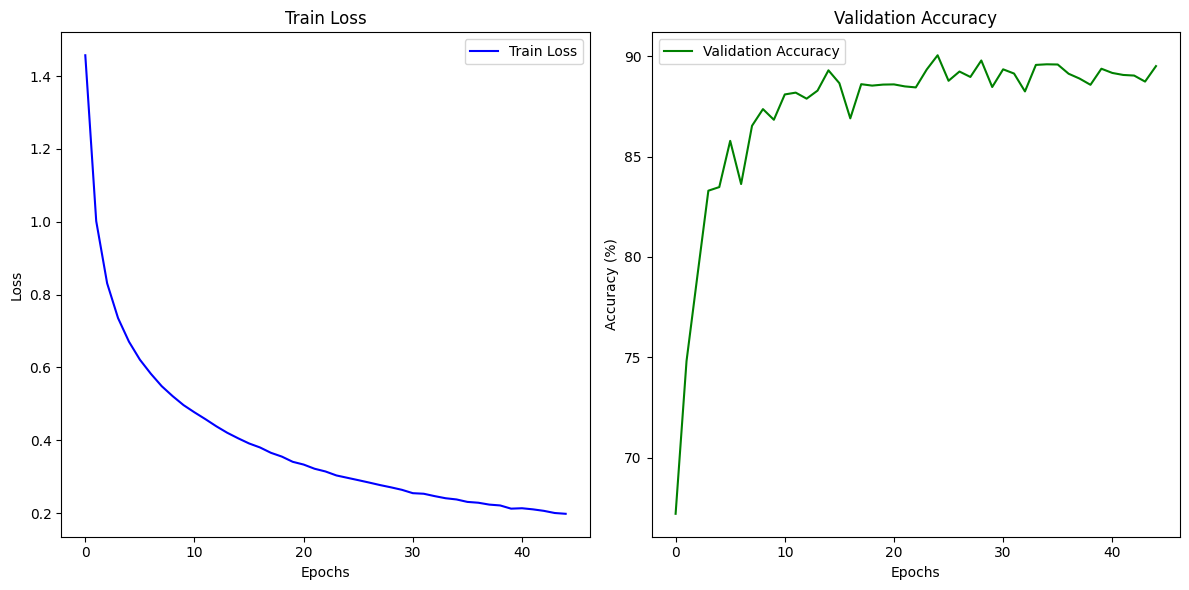

Loading the best model from Model_DenseNet...
Test Accuracy: 90.04%


90.04

In [ ]:
# Load the combined dataset, using more augmented images (40000 initial images+ 120000 augmented images)
trainloader_aug = load_combined_data('data/augmented_images_2/combined_data.pkl')

model_DenseNet = model_DenseNet(growth_rate=24, block_config=[6, 12, 48, 32], num_init_features=64, bn_size=4, drop_rate=0.2, num_classes=10, in_channels=3, activation='GELU', compression=2).to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_DenseNet.parameters(), lr=0.001, weight_decay=0.0001)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200, eta_min=1e-6)
path = 'Model_DenseNet'
train(model_DenseNet, trainloader_aug, validationloader, criterion, optimizer, scheduler, device, model_path=path, epochs=200, early_stopping=True, patience=20)
test(model_DenseNet, testloader, device, model_path=path)